In [10]:
from data import EMGDataset
from util import plot_fft, plot_time_series, plot_histogram
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, filtfilt
import pandas as pd

def _filter_data(data: np.ndarray, fs: float) -> np.ndarray:
        # Define the notch frequency and quality factor
        notch_freq = 50  # Hz
        Q = 30

        # Calculate the normalized frequency and design the filter
        w0 = notch_freq / (fs / 2)
        b_notch, a_notch = iirnotch(w0, Q)

        # Apply the filter to your signal using filtfilt to avoid phase shift
        filtered_signal = filtfilt(b_notch, a_notch, data)
        
        return filtered_signal 

In [3]:
data_path = 'dataset/data_2023-10-02 14-59-55-627.edf'
label_path = 'dataset/label_2023-10-02_15-24-12_YH_lab_R.csv'
dataset = EMGDataset(data_path, label_path)


Extracting EDF parameters from /Users/rufaelmarew/Documents/tau/finger_pose_estimation/dataset/data_2023-10-02 14-59-55-627.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 345249  =      0.000 ...  1380.996 secs...


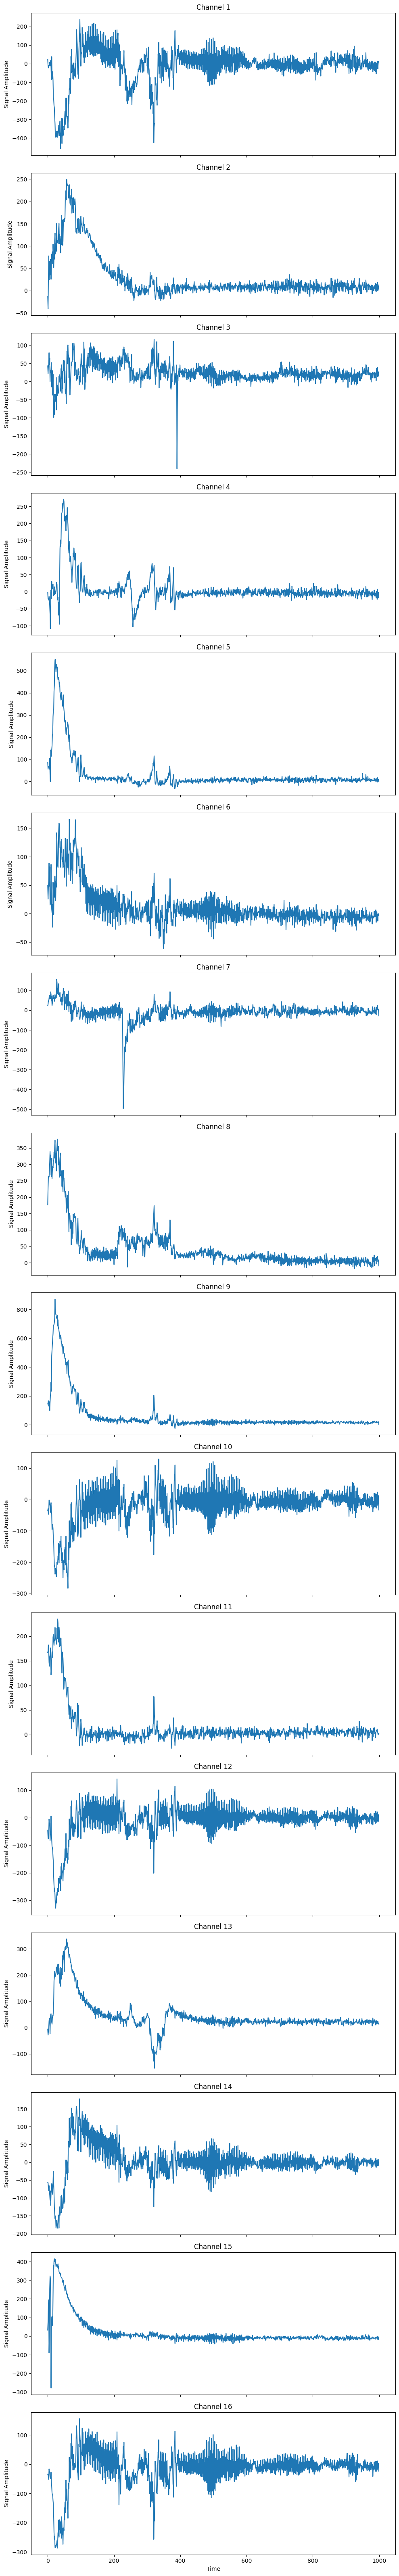

In [13]:
#filter data
fs = dataset.fs
data = dataset.data.values
data = _filter_data(data, fs)

#convert to dataframe
data = pd.DataFrame(data, columns=dataset.data.columns)

#plot time series
plot_time_series(data.head(1000))

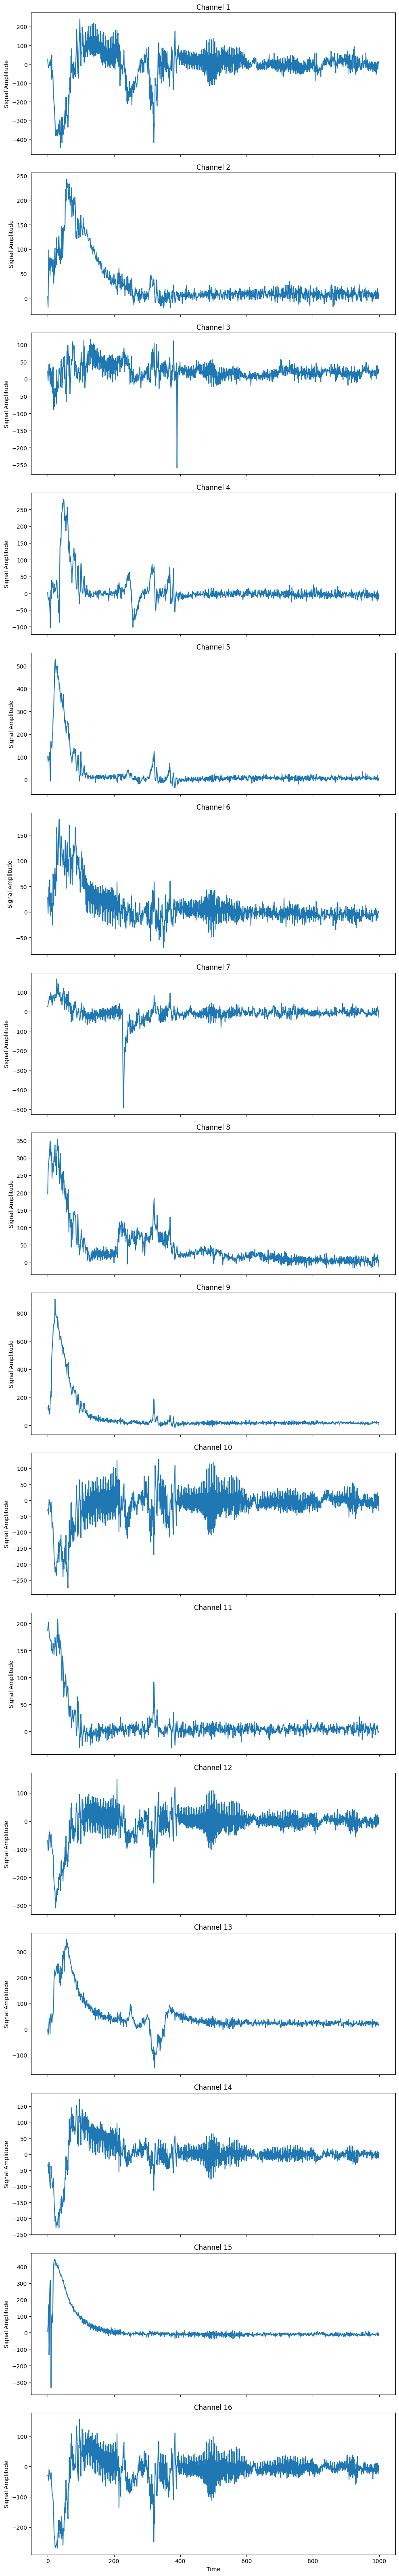

In [15]:

plot_time_series(dataset.data.head(1000))